# Data proceeding

In [2]:
# %load_ext autoreload
# %autoreload 2


import numpy as np
import pandas as pd

import matplotlib.pylab as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
# plt.rcParams["figure.figsize"] = (12, 12)

import datetime

from pandas.plotting import scatter_matrix
import seaborn as sns; sns.set()

In [3]:
data_file = '../data/test_data2.csv'

In [4]:
df = pd.read_csv(data_file)

In [5]:
df.head()

,period_end_date,translated_when,if_data_corrected,prod_gr_id,country_id_n,delivery_type_id,freq_id,retailer_id,brand_id,predict_automatch,class_acctual
0,,2020-10-15T06:58:28+0000,0,426,121,,2,96,111,1,1
1,,2020-10-15T06:38:34+0000,0,426,,,2,92,95,0,1
2,2020-09-20T00:00:00+0000,2020-09-23T12:27:51+0000,0,426,121,42730,2,30,37,1,1
3,2020-09-20T00:00:00+0000,2020-09-23T12:26:41+0000,0,426,121,42730,2,92,203,1,1
4,2020-09-20T00:00:00+0000,2020-09-22T09:40:36+0000,0,426,121,50128,2,9,31,1,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19697 entries, 0 to 19696
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   period_end_date    19697 non-null  object
 1   translated_when    19697 non-null  object
 2   if_data_corrected  19697 non-null  int64 
 3   prod_gr_id         19697 non-null  int64 
 4   country_id_n       19697 non-null  object
 5   delivery_type_id   19697 non-null  object
 6   freq_id            19697 non-null  int64 
 7   retailer_id        19697 non-null  int64 
 8   brand_id           19697 non-null  int64 
 9   predict_automatch  19697 non-null  object
 10  class_acctual      19697 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 1.7+ MB


In [7]:
df.describe()

,if_data_corrected,prod_gr_id,freq_id,retailer_id,brand_id,class_acctual
count,19697.000000,19697.000000,19697.000000,19697.000000,19697.000000,19697.000000
mean,0.132609,423.210184,1.605879,84.649693,172.877697,0.743210
std,0.339160,5.556911,0.488673,53.987902,110.803952,0.436874
min,0.000000,413.000000,1.000000,9.000000,19.000000,0.000000
25%,0.000000,426.000000,1.000000,31.000000,76.000000,0.000000
50%,0.000000,426.000000,2.000000,92.000000,169.000000,1.000000
75%,0.000000,426.000000,2.000000,120.000000,243.000000,1.000000
max,1.000000,427.000000,2.000000,211.000000,433.000000,1.000000


In [8]:
df.index

RangeIndex(start=0, stop=19697, step=1)

In [9]:
df.dtypes

period_end_date      object
translated_when      object
if_data_corrected     int64
prod_gr_id            int64
country_id_n         object
delivery_type_id     object
freq_id               int64
retailer_id           int64
brand_id              int64
predict_automatch    object
class_acctual         int64
dtype: object

In [10]:
df.shape

(19697, 11)

In [11]:
pd.isna(df)

,period_end_date,translated_when,if_data_corrected,prod_gr_id,country_id_n,delivery_type_id,freq_id,retailer_id,brand_id,predict_automatch,class_acctual
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
19692,False,False,False,False,False,False,False,False,False,False,False
19693,False,False,False,False,False,False,False,False,False,False,False
19694,False,False,False,False,False,False,False,False,False,False,False
19695,False,False,False,False,False,False,False,False,False,False,False


In [12]:
fd = pd.to_datetime(df['period_end_date'], errors='coerce')

In [13]:
fd

0                             NaT
1                             NaT
2       2020-09-20 00:00:00+00:00
3       2020-09-20 00:00:00+00:00
4       2020-09-20 00:00:00+00:00
                   ...           
19692   2020-11-01 00:00:00+00:00
19693   2020-11-01 00:00:00+00:00
19694   2020-11-01 00:00:00+00:00
19695   2020-11-01 00:00:00+00:00
19696   2020-11-01 00:00:00+00:00
Name: period_end_date, Length: 19697, dtype: datetime64[ns, UTC]

In [14]:
fd.dt.time

0             NaT
1             NaT
2        00:00:00
3        00:00:00
4        00:00:00
           ...   
19692    00:00:00
19693    00:00:00
19694    00:00:00
19695    00:00:00
19696    00:00:00
Name: period_end_date, Length: 19697, dtype: object

In [15]:
sum(pd.isna(fd))

57

In [16]:
fd.dt.time.unique()

array([NaT, datetime.time(0, 0)], dtype=object)

The timestamp for the column **period_end_date** is midnight. Therefore only date is used.

In [17]:
df['period_end_date'] = pd.to_datetime(df['period_end_date'], errors='coerce').dt.date

In [18]:
df.head()

,period_end_date,translated_when,if_data_corrected,prod_gr_id,country_id_n,delivery_type_id,freq_id,retailer_id,brand_id,predict_automatch,class_acctual
0,NaT,2020-10-15T06:58:28+0000,0,426,121,,2,96,111,1,1
1,NaT,2020-10-15T06:38:34+0000,0,426,,,2,92,95,0,1
2,2020-09-20,2020-09-23T12:27:51+0000,0,426,121,42730,2,30,37,1,1
3,2020-09-20,2020-09-23T12:26:41+0000,0,426,121,42730,2,92,203,1,1
4,2020-09-20,2020-09-22T09:40:36+0000,0,426,121,50128,2,9,31,1,1


In [19]:
sorted(df['period_end_date'].unique())

<ipython-input-19-62b4cc8385a5>:1: FutureWarning: Comparison of NaT with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.
  sorted(df['period_end_date'].unique())


[NaT,
 datetime.date(2020, 8, 30),
 datetime.date(2020, 9, 1),
 datetime.date(2020, 9, 6),
 datetime.date(2020, 9, 13),
 datetime.date(2020, 9, 20),
 datetime.date(2020, 9, 27),
 datetime.date(2020, 10, 1),
 datetime.date(2020, 10, 4),
 datetime.date(2020, 10, 11),
 datetime.date(2020, 10, 18),
 datetime.date(2020, 10, 25),
 datetime.date(2020, 11, 1),
 datetime.date(2020, 11, 8),
 datetime.date(2020, 11, 15),
 datetime.date(2020, 11, 22),
 datetime.date(2020, 11, 29),
 datetime.date(2020, 12, 1)]

In [20]:
df['period_end_date'].value_counts()

2020-11-22    2192
2020-11-01    2063
2020-11-15    1775
2020-10-18    1442
2020-10-25    1373
2020-09-27    1341
2020-09-06    1339
2020-10-11    1296
2020-09-13    1242
2020-10-04    1218
2020-09-20    1025
2020-11-08     966
2020-10-01     945
2020-09-01     876
2020-08-30     303
2020-11-29     241
2020-12-01       3
Name: period_end_date, dtype: int64

In [21]:
len(df['period_end_date'].unique())

18

# translated_when

In [22]:
fd2 = pd.to_datetime(df['translated_when'], errors='coerce')

In [23]:
fd2

0       2020-10-15 06:58:28+00:00
1       2020-10-15 06:38:34+00:00
2       2020-09-23 12:27:51+00:00
3       2020-09-23 12:26:41+00:00
4       2020-09-22 09:40:36+00:00
                   ...           
19692   2020-11-09 10:47:04+00:00
19693   2020-11-09 10:28:33+00:00
19694   2020-11-09 10:50:29+00:00
19695   2020-12-07 07:04:54+00:00
19696   2020-11-09 13:50:57+00:00
Name: translated_when, Length: 19697, dtype: datetime64[ns, UTC]

In [24]:
df['translated_when'] = pd.to_datetime(df['translated_when'], errors='coerce')

In [25]:
len(df['translated_when'].unique())

15628

In [26]:
tdf = df.set_index('translated_when').sort_index()
tdf.tail()

,period_end_date,if_data_corrected,prod_gr_id,country_id_n,delivery_type_id,freq_id,retailer_id,brand_id,predict_automatch,class_acctual
translated_when,,,,,,,,,,
2021-01-27 17:35:47+00:00,2020-11-22,0,426,114,24898,2,93,96,1,1
2021-01-28 10:44:57+00:00,2020-11-22,0,426,121,21378,2,96,111,1,1
2021-01-28 13:48:19+00:00,2020-11-22,0,426,121,42730,1,22,123,1,1
2021-01-29 09:56:17+00:00,2020-11-29,0,426,109,1648,1,124,263,0,1
2021-02-01 14:50:49+00:00,2020-11-01,1,426,105,41728,2,11,33,1,1


<AxesSubplot:xlabel='translated_when'>

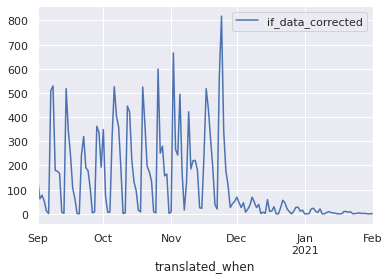

In [27]:
def f(x): return x.shape[0]
tdf.resample('D').agg({'if_data_corrected':f}).plot()

# if_data_corrected

In [28]:
idc = df['if_data_corrected']

In [29]:
idc.unique()

array([0, 1])

In [30]:
idc.value_counts()

0    17085
1     2612
Name: if_data_corrected, dtype: int64

In [31]:
17085 + 2612, 17085/19697, 2612 /19697

(19697, 0.8673909732446565, 0.13260902675534345)

In [32]:
dec1st = datetime.date(year=2020, month=12, day=1)
df[df['translated_when'].dt.date <= dec1st]['if_data_corrected'].value_counts()

0    16246
1     2572
Name: if_data_corrected, dtype: int64

In [111]:
899 + 49, 899/ 948, 49/948

(948, 0.9483122362869199, 0.05168776371308017)

<AxesSubplot:>

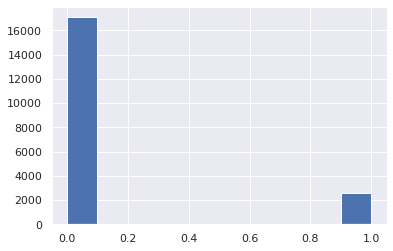

In [5]:
df.if_data_corrected.hist()

# prod_gr_id

In [6]:
pgi = df['prod_gr_id']

In [7]:
pgi.value_counts()

426    11844
413     4486
427     3367
Name: prod_gr_id, dtype: int64

In [8]:
11844 + 4486 + 3367

19697

In [112]:
pgi.value_counts() / 19697

426    0.60131
413    0.22775
427    0.17094
Name: prod_gr_id, dtype: float64

<AxesSubplot:>

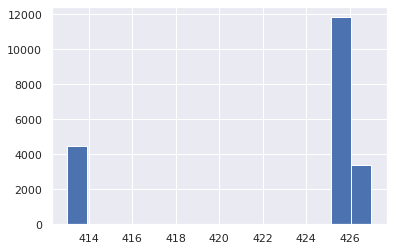

In [13]:
df['prod_gr_id'].hist(bins=15)

# country_id_n

In [114]:
cin = df['country_id_n']

In [115]:
len(cin.unique())

35

In [74]:
cin.replace(' ', pd.NaT, inplace=True)

In [75]:
sum(pd.isna(cin))

1292

In [75]:
df['country_id_n'].replace(' ', pd.NaT, inplace=True)
df['country_id_n'] = pd.to_numeric(df['country_id_n'], errors='coerce')

<AxesSubplot:>

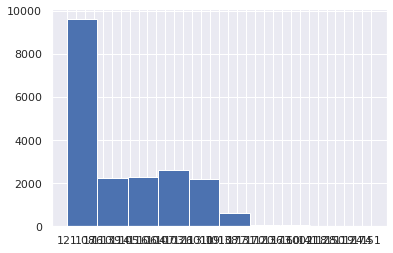

In [14]:
df['country_id_n'].hist()

<AxesSubplot:xlabel='country_id_n'>

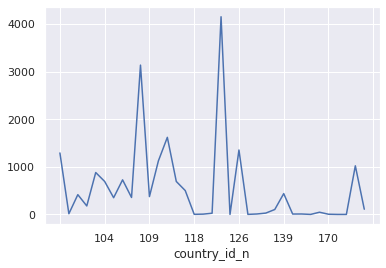

In [18]:
df.groupby(by='country_id_n').apply(lambda x: x.shape[0]).plot()

# delivery_type_id


In [57]:
df['delivery_type_id'].replace(' ', pd.NaT, inplace=True)

In [20]:
len(df['delivery_type_id'].unique())

915

In [ ]:
df['delivery_type_id'].unique()

In [59]:
df['delivery_type_id'] = pd.to_numeric(df['delivery_type_id'], errors='coerce')

In [20]:
sum(pd.isna(df['delivery_type_id']))

1335

# freq_id

In [17]:
df['freq_id'].value_counts()

2    11934
1     7763
Name: freq_id, dtype: int64

In [117]:
df['freq_id'].value_counts() / 19697

2    0.605879
1    0.394121
Name: freq_id, dtype: float64

In [116]:
df[df['translated_when'].dt.date >= dec1st]['freq_id'].value_counts()

2    556
1    392
Name: freq_id, dtype: int64

In [118]:
df[df['translated_when'].dt.date >= dec1st]['freq_id'].value_counts() / np.sum(df['translated_when'].dt.date >= dec1st)

2    0.586498
1    0.413502
Name: freq_id, dtype: float64

# retailer_id

In [121]:
len(df['retailer_id'].unique())

52

# brand_id

In [122]:
len(df['brand_id'].unique())

199

In [26]:
df['predict_automatch'].unique()

array(['1', '0', ' '], dtype=object)

In [60]:
df['predict_automatch'] = pd.to_numeric(df['predict_automatch'], errors='coerce')

In [29]:
sum(pd.isna(pd.to_numeric(df['predict_automatch'], errors='coerce')))

329

In [30]:
pd.to_numeric(df['class_acctual'], errors='coerce')

0        1
1        1
2        1
3        1
4        1
        ..
19692    0
19693    0
19694    0
19695    1
19696    1
Name: class_acctual, Length: 19697, dtype: int64

In [31]:
sum(pd.isna(pd.to_numeric(df['class_acctual'], errors='coerce')))

0

In [61]:
df.head()

,period_end_date,translated_when,if_data_corrected,prod_gr_id,country_id_n,delivery_type_id,freq_id,retailer_id,brand_id,predict_automatch,class_acctual
0,NaT,2020-10-15T06:58:28+0000,0,426,121,NaN,2,96,111,1.0,1
1,NaT,2020-10-15T06:38:34+0000,0,426,NaT,NaN,2,92,95,0.0,1
2,2020-09-20,2020-09-23T12:27:51+0000,0,426,121,42730.0,2,30,37,1.0,1
3,2020-09-20,2020-09-23T12:26:41+0000,0,426,121,42730.0,2,92,203,1.0,1
4,2020-09-20,2020-09-22T09:40:36+0000,0,426,121,50128.0,2,9,31,1.0,1


In [76]:
df.apply(lambda x: sum(pd.isna(x)), axis=0)

period_end_date        57
translated_when         0
if_data_corrected       0
prod_gr_id              0
country_id_n         1292
delivery_type_id     1335
freq_id                 0
retailer_id             0
brand_id                0
predict_automatch     329
class_acctual           0
dtype: int64

In [77]:
df.dtypes

period_end_date                   object
translated_when      datetime64[ns, UTC]
if_data_corrected                  int64
prod_gr_id                         int64
country_id_n                     float64
delivery_type_id                 float64
freq_id                            int64
retailer_id                        int64
brand_id                           int64
predict_automatch                float64
class_acctual                      int64
dtype: object

In [78]:
df.describe()

,if_data_corrected,prod_gr_id,country_id_n,delivery_type_id,freq_id,retailer_id,brand_id,predict_automatch,class_acctual
count,19697.000000,19697.000000,18405.000000,18362.000000,19697.000000,19697.000000,19697.000000,19368.000000,19697.000000
mean,0.132609,423.210184,148.013094,46210.125531,1.605879,84.649693,172.877697,0.636307,0.743210
std,0.339160,5.556911,160.518915,20277.200094,0.488673,53.987902,110.803952,0.481074,0.436874
min,0.000000,413.000000,103.000000,428.000000,1.000000,9.000000,19.000000,0.000000,0.000000
25%,0.000000,426.000000,108.000000,30152.000000,1.000000,31.000000,76.000000,0.000000,0.000000
50%,0.000000,426.000000,113.000000,48305.000000,2.000000,92.000000,169.000000,1.000000,1.000000
75%,0.000000,426.000000,121.000000,62634.000000,2.000000,120.000000,243.000000,1.000000,1.000000
max,1.000000,427.000000,1011.000000,79000.000000,2.000000,211.000000,433.000000,1.000000,1.000000


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19697 entries, 0 to 19696
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   period_end_date    19640 non-null  object             
 1   translated_when    19697 non-null  datetime64[ns, UTC]
 2   if_data_corrected  19697 non-null  int64              
 3   prod_gr_id         19697 non-null  int64              
 4   country_id_n       18405 non-null  float64            
 5   delivery_type_id   18362 non-null  float64            
 6   freq_id            19697 non-null  int64              
 7   retailer_id        19697 non-null  int64              
 8   brand_id           19697 non-null  int64              
 9   predict_automatch  19368 non-null  float64            
 10  class_acctual      19697 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(3), int64(6), object(1)
memory usage: 1.7+ MB
